In [1]:
import pandas as pd
import pygwalker as pyg

In [2]:
df = pd.read_csv('../data/trips-clean.csv', header=0, date_format='%Y-%m-%d %H:%M:%S', parse_dates=['StartTime', 'EndTime'])
df.head()

,VehicleNum,StartTime,EndTime,StartLng,StartLat,EndLng,EndLat,TripTime,TripDistance
0,22223.0,2013-10-22 00:03:39,2013-10-22 00:11:04,114.167732,22.562550,114.225487,22.552933,7.416667,6.035011
1,22223.0,2013-10-22 00:11:49,2013-10-22 00:15:35,114.227264,22.554234,114.229202,22.560150,3.766667,0.684779
2,22223.0,2013-10-22 00:17:29,2013-10-22 00:29:21,114.231598,22.562349,114.255898,22.591000,11.866667,4.038736
3,22223.0,2013-10-22 00:37:01,2013-10-22 00:54:58,114.239700,22.563450,114.119637,22.565916,17.950000,12.351299
4,22223.0,2013-10-22 01:01:29,2013-10-22 01:08:33,114.136467,22.575583,114.166786,22.608232,7.066667,4.774048


In [3]:
# # 可能需要重新命名
# df.rename(columns={'EndStime': 'EndTime',
#                    'StartStime': 'StartTime'}, inplace=True)
# df.to_csv('../data/trips-clean.csv', header=True, index=False)

In [4]:
df.columns, df.shape

(Index(['VehicleNum', 'StartTime', 'EndTime', 'StartLng', 'StartLat', 'EndLng',
        'EndLat', 'TripTime', 'TripDistance'],
       dtype='object'),
 (495294, 9))

In [5]:
# 进行一些处理
# 我们先查看数据的分布，现在的时间是以分钟为单位的，我们聚合到24小时内。
df['StartHour'] = pd.to_datetime(df['StartTime']).dt.hour
df['EndHour'] = pd.to_datetime(df['EndTime']).dt.hour
df.head()

,VehicleNum,StartTime,EndTime,StartLng,StartLat,EndLng,EndLat,TripTime,TripDistance,StartHour,EndHour
0,22223.0,2013-10-22 00:03:39,2013-10-22 00:11:04,114.167732,22.562550,114.225487,22.552933,7.416667,6.035011,0,0
1,22223.0,2013-10-22 00:11:49,2013-10-22 00:15:35,114.227264,22.554234,114.229202,22.560150,3.766667,0.684779,0,0
2,22223.0,2013-10-22 00:17:29,2013-10-22 00:29:21,114.231598,22.562349,114.255898,22.591000,11.866667,4.038736,0,0
3,22223.0,2013-10-22 00:37:01,2013-10-22 00:54:58,114.239700,22.563450,114.119637,22.565916,17.950000,12.351299,0,0
4,22223.0,2013-10-22 01:01:29,2013-10-22 01:08:33,114.136467,22.575583,114.166786,22.608232,7.066667,4.774048,1,1


In [6]:
df['StartHour']

0          0
1          0
2          0
3          0
4          1
          ..
495289    22
495290    22
495291    22
495292    23
495293    23
Name: StartHour, Length: 495294, dtype: int32

In [7]:
# 先利用可视化工具快速进行数据探索
walker = pyg.walk(
    df,
    spec="./chart_meta_0.json",    # 这个JSON文件将保存您的图表状态，当您完成一个图表时，需要在UI界面上手动点击保存按钮。在未来，将支持“自动保存”。
    use_kernel_calc=True,          # 如果设置`use_kernel_calc=True` ，pygwalker 将使用duckdb作为计算引擎，它支持您探索更大的数据集（<=100GB）。
)

Box(children=(HTML(value='<div id="ifr-pyg-000614e102d1e027wqt2eMz69cHyaRWQ" style="height: auto">\n    <head>…

## seanborn手动绘图

In [7]:
## 导入包 设置中文字体
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

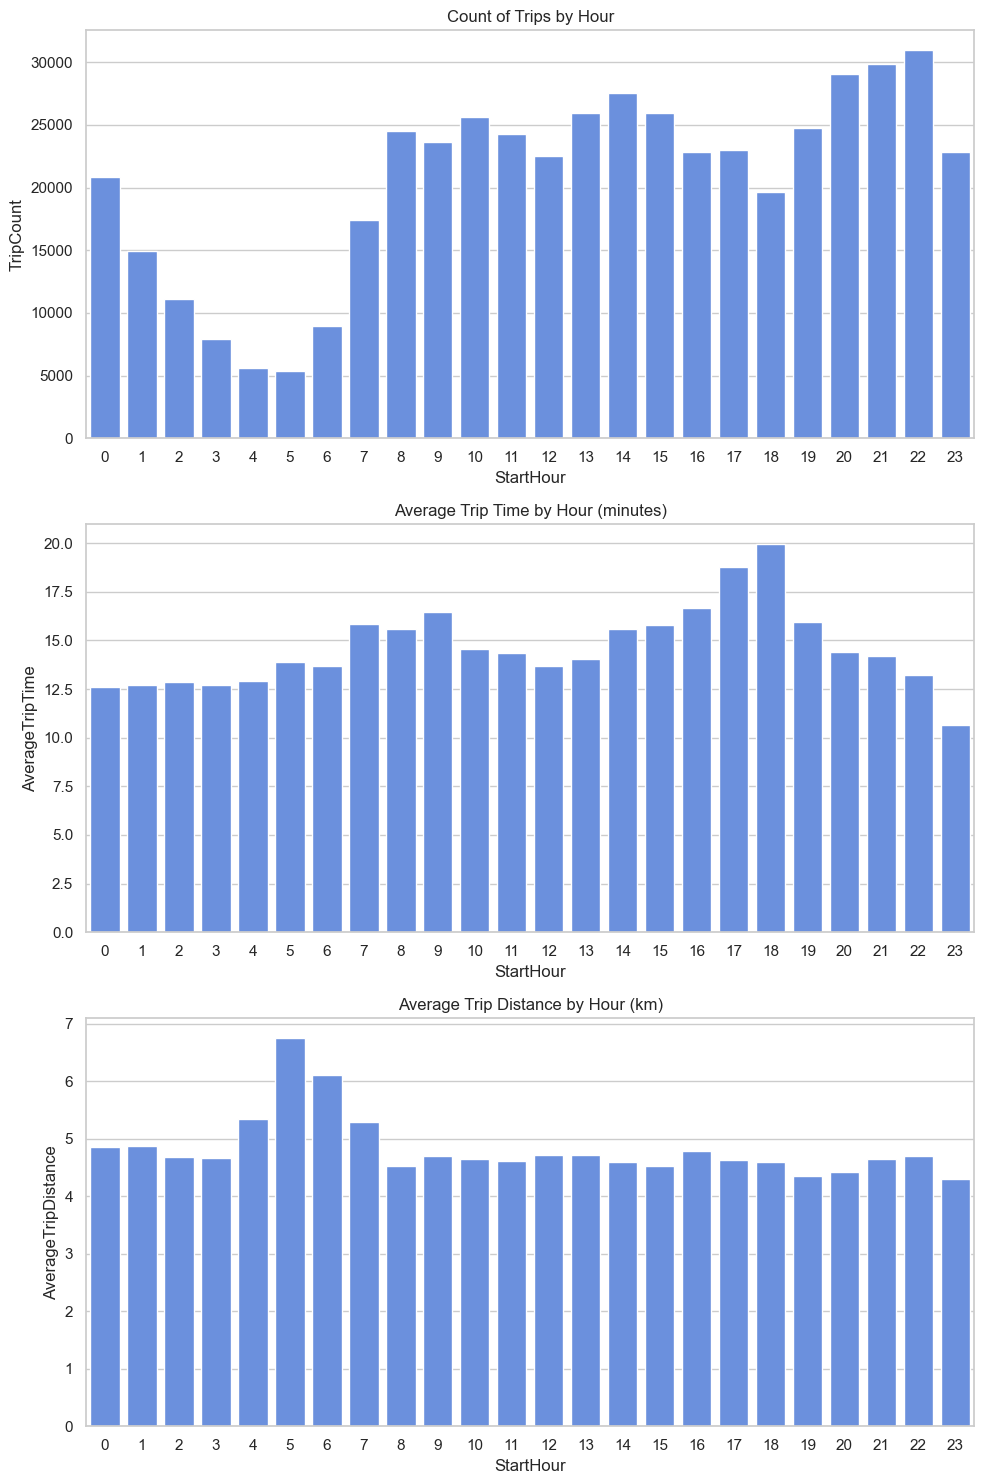

In [8]:
# Calculate the count of trips, average trip time, and average trip distance by hour
hourly_stats = df.groupby('StartHour').agg(
    TripCount=('VehicleNum', 'count'),
    AverageTripTime=('TripTime', 'mean'),
    AverageTripDistance=('TripDistance', 'mean')
).reset_index()
# Set Seaborn theme and color codes as per the new instructions
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
# Define the color for the plots
bar_color = '#588af0'

# Create the plots with the updated style and color
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot count of trips by hour
sns.barplot(ax=axes[0], x='StartHour', y='TripCount', data=hourly_stats, color=bar_color)
axes[0].set_title('Count of Trips by Hour')

# Plot average trip time by hour
sns.barplot(ax=axes[1], x='StartHour', y='AverageTripTime', data=hourly_stats, color=bar_color)
axes[1].set_title('Average Trip Time by Hour (minutes)')

# Plot average trip distance by hour
sns.barplot(ax=axes[2], x='StartHour', y='AverageTripDistance', data=hourly_stats, color=bar_color)
axes[2].set_title('Average Trip Distance by Hour (km)')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:

### 2.出租车的平均出行时间分布 用箱线图
### 3.出租车的平均出行距离分布 用箱线图
### 4.出行起点的空间分布：a.栅格化或者热力图 b.散点图（数据很多） c. od图！ d.映射到道路网上，，叫空间分布散点图 e交通小区识别
### 5.出行终点的空间分布（同上）
### 6.将出行起点和终点的空间分布叠加在一起，可以看出出租车的使用热点区域？
### 7.出行订单
